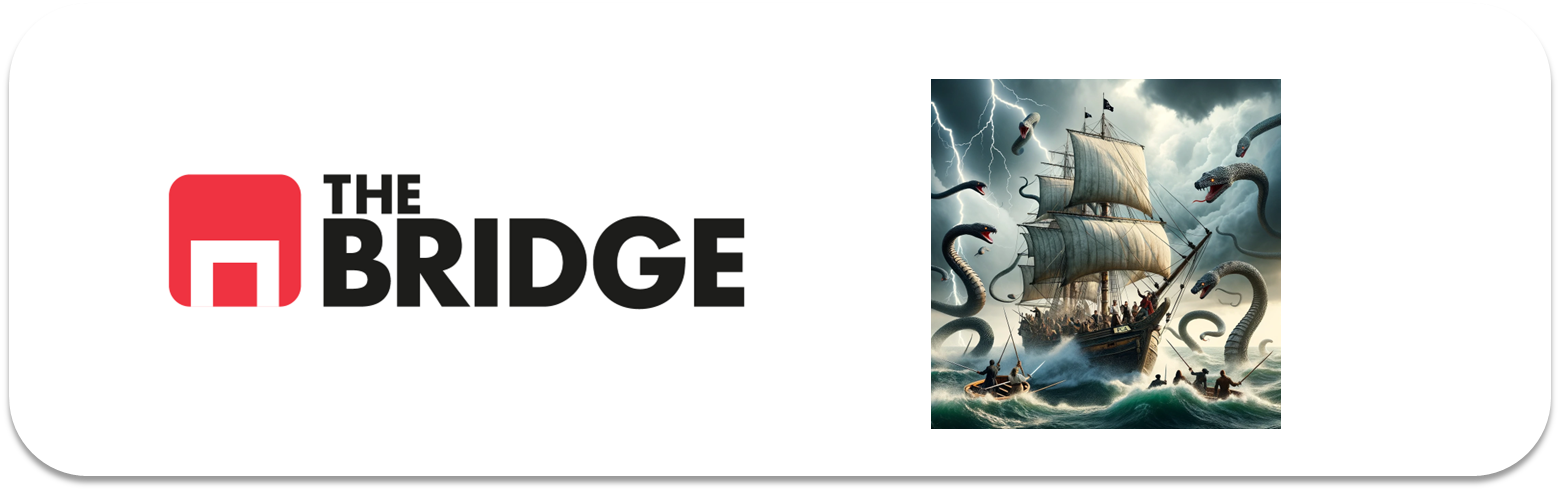

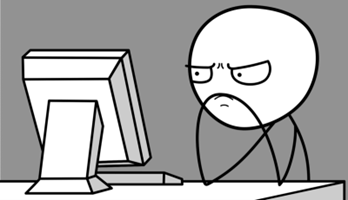

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv("./data/nutrition.csv")
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

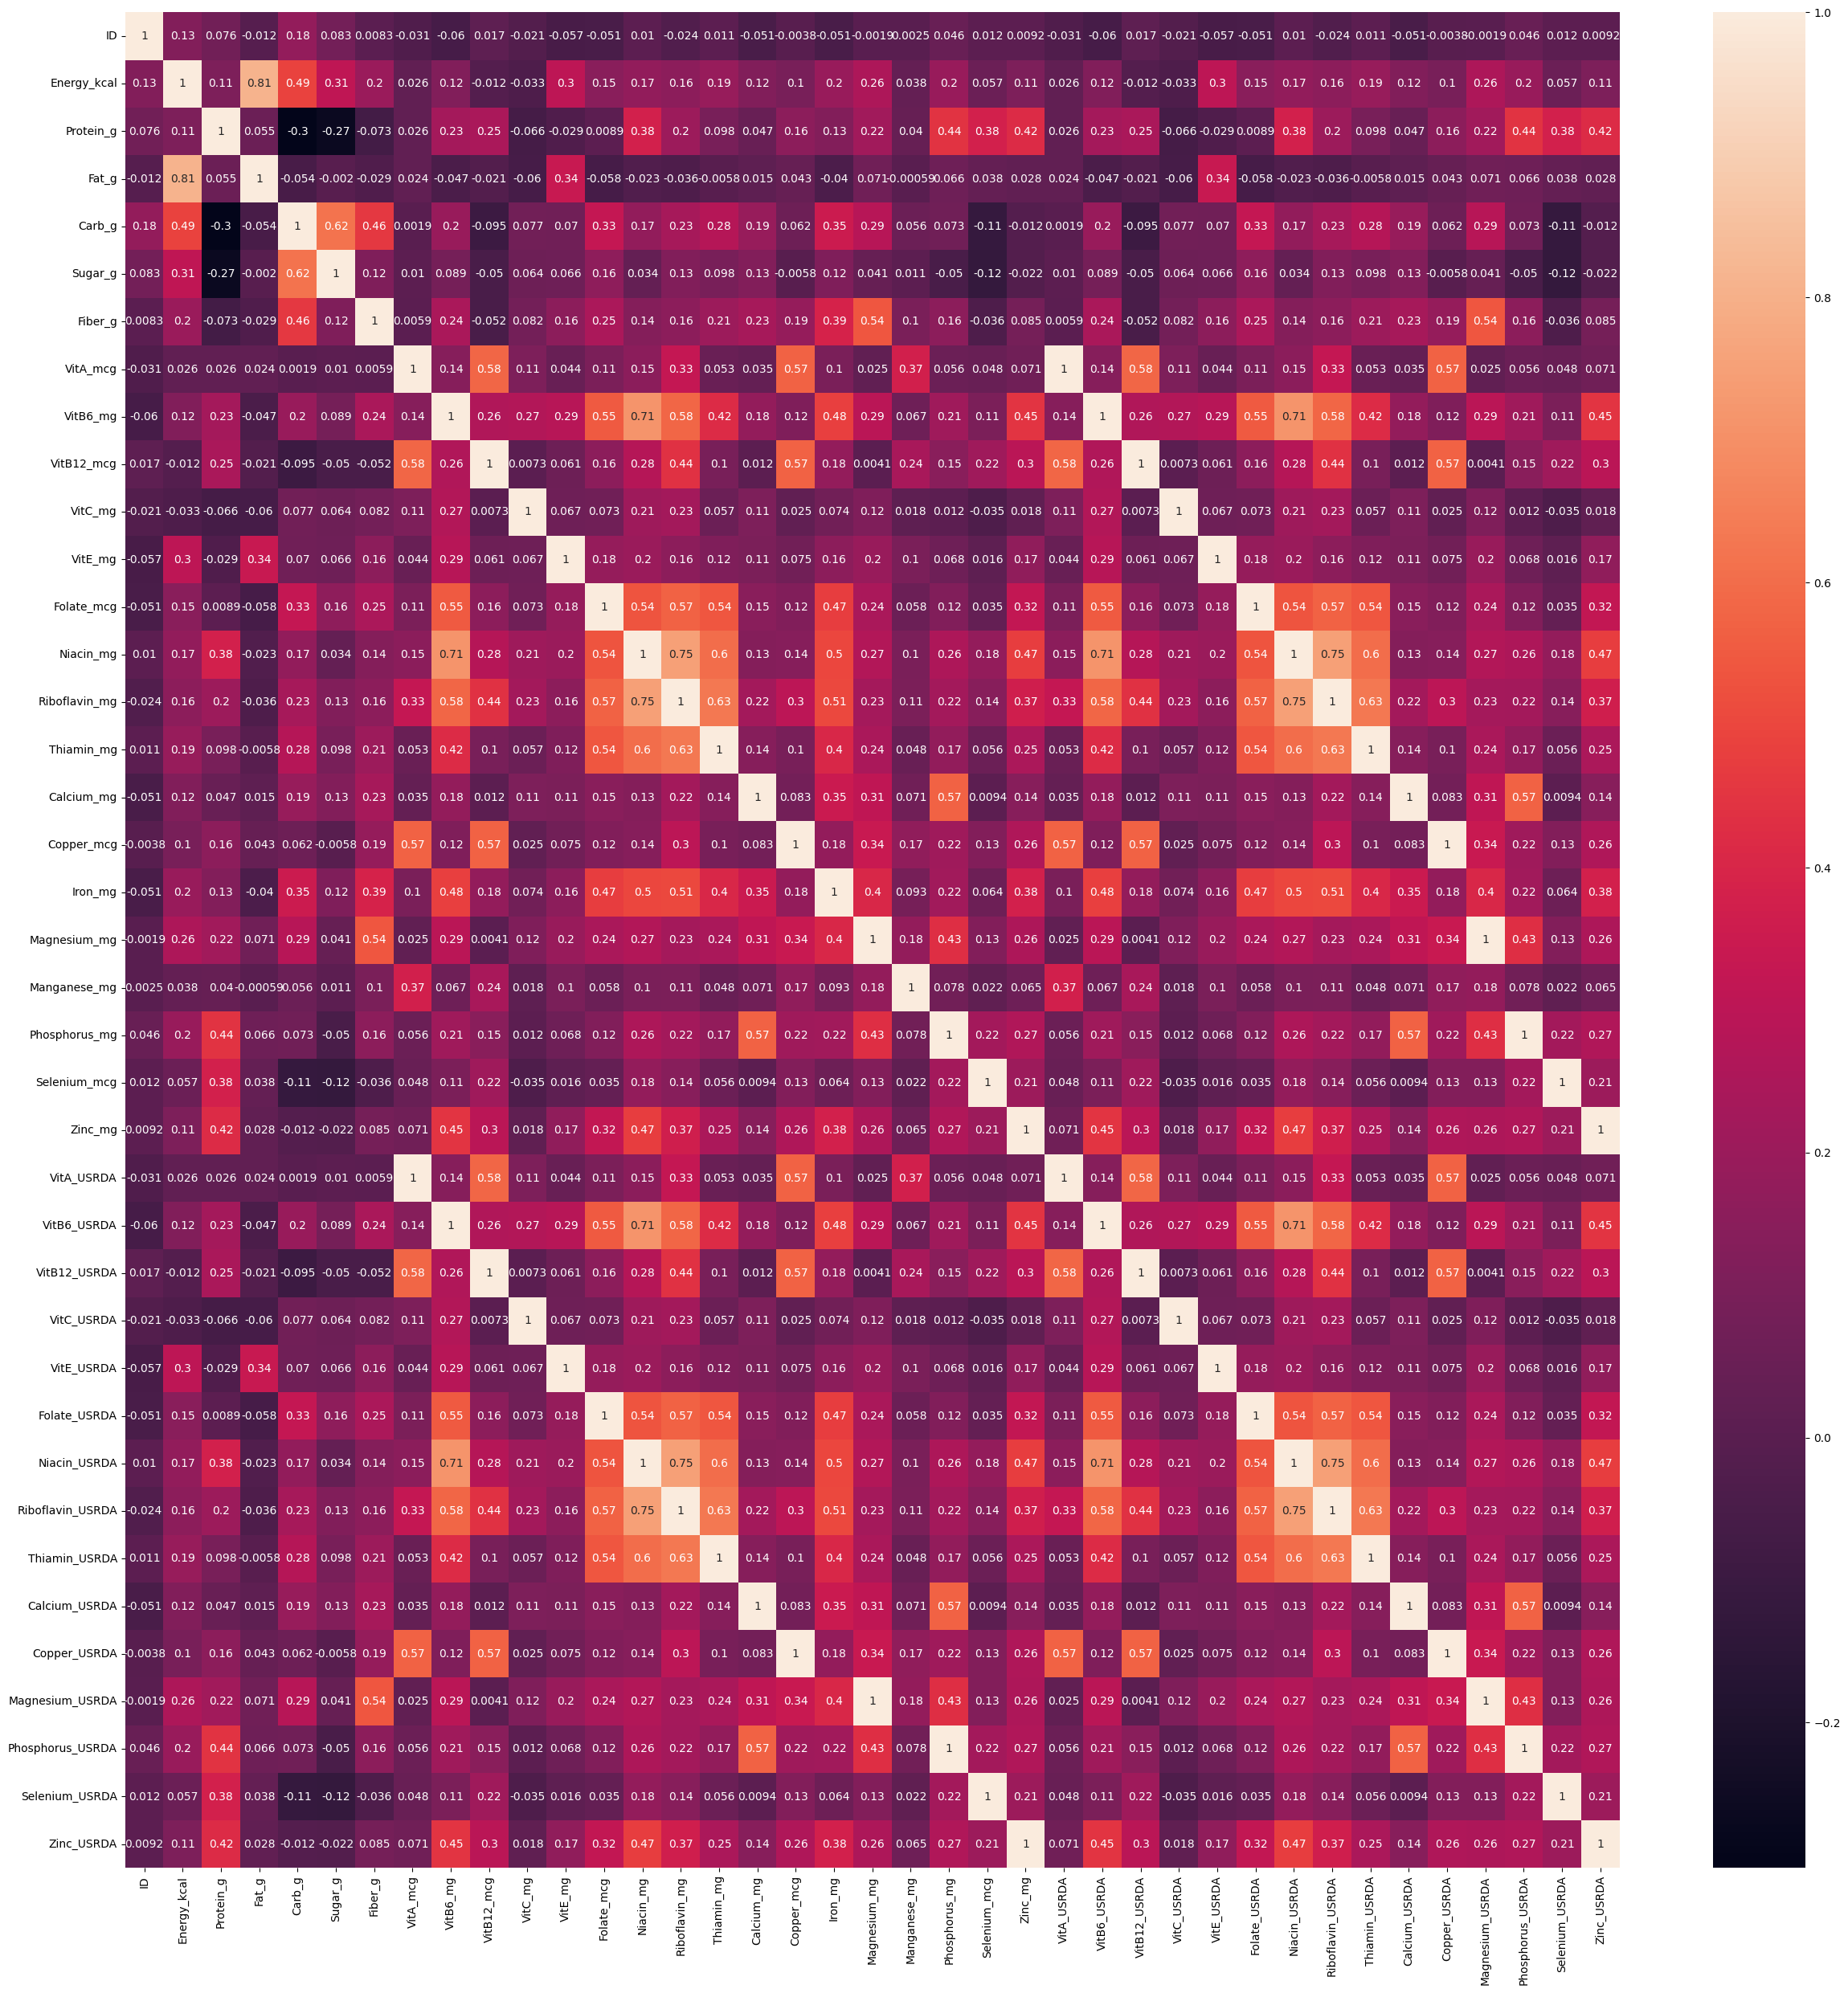

In [4]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(numeric_only = True), annot = True);

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [5]:
col_usrda = df.filter(like = "USRDA")
col_usrda.describe().T

,count,mean,std,min,25%,50%,75%,max
VitA_USRDA,8618.0,0.104410,0.865958,0.0,0.000000,0.001667,0.023333,33.333333
VitB6_USRDA,8618.0,0.155511,0.281538,0.0,0.020147,0.070588,0.208824,7.058824
VitB12_USRDA,8618.0,0.510525,1.799659,0.0,0.000000,0.033333,0.540625,41.204167
VitC_USRDA,8618.0,0.088060,0.639808,0.0,0.000000,0.000000,0.027778,26.666667
VitE_USRDA,8618.0,0.058155,0.256602,0.0,0.000000,0.007333,0.030000,9.960000
Folate_USRDA,8618.0,0.125765,0.466402,0.0,0.000000,0.017500,0.062500,14.702500
Niacin_USRDA,8618.0,0.213222,0.302161,0.0,0.023875,0.131250,0.314328,7.968750
Riboflavin_USRDA,8618.0,0.182499,0.346062,0.0,0.035385,0.115385,0.200000,13.461538
Thiamin_USRDA,8618.0,0.174881,0.431974,0.0,0.025000,0.064583,0.185833,19.479167
Calcium_USRDA,8618.0,0.061176,0.167803,0.0,0.007500,0.015833,0.051667,6.136667


In [6]:
df.drop(columns = df.columns[df.columns.str.contains("USRDA")], inplace = True)

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [7]:
df = df.select_dtypes(exclude = ["object"])
df

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


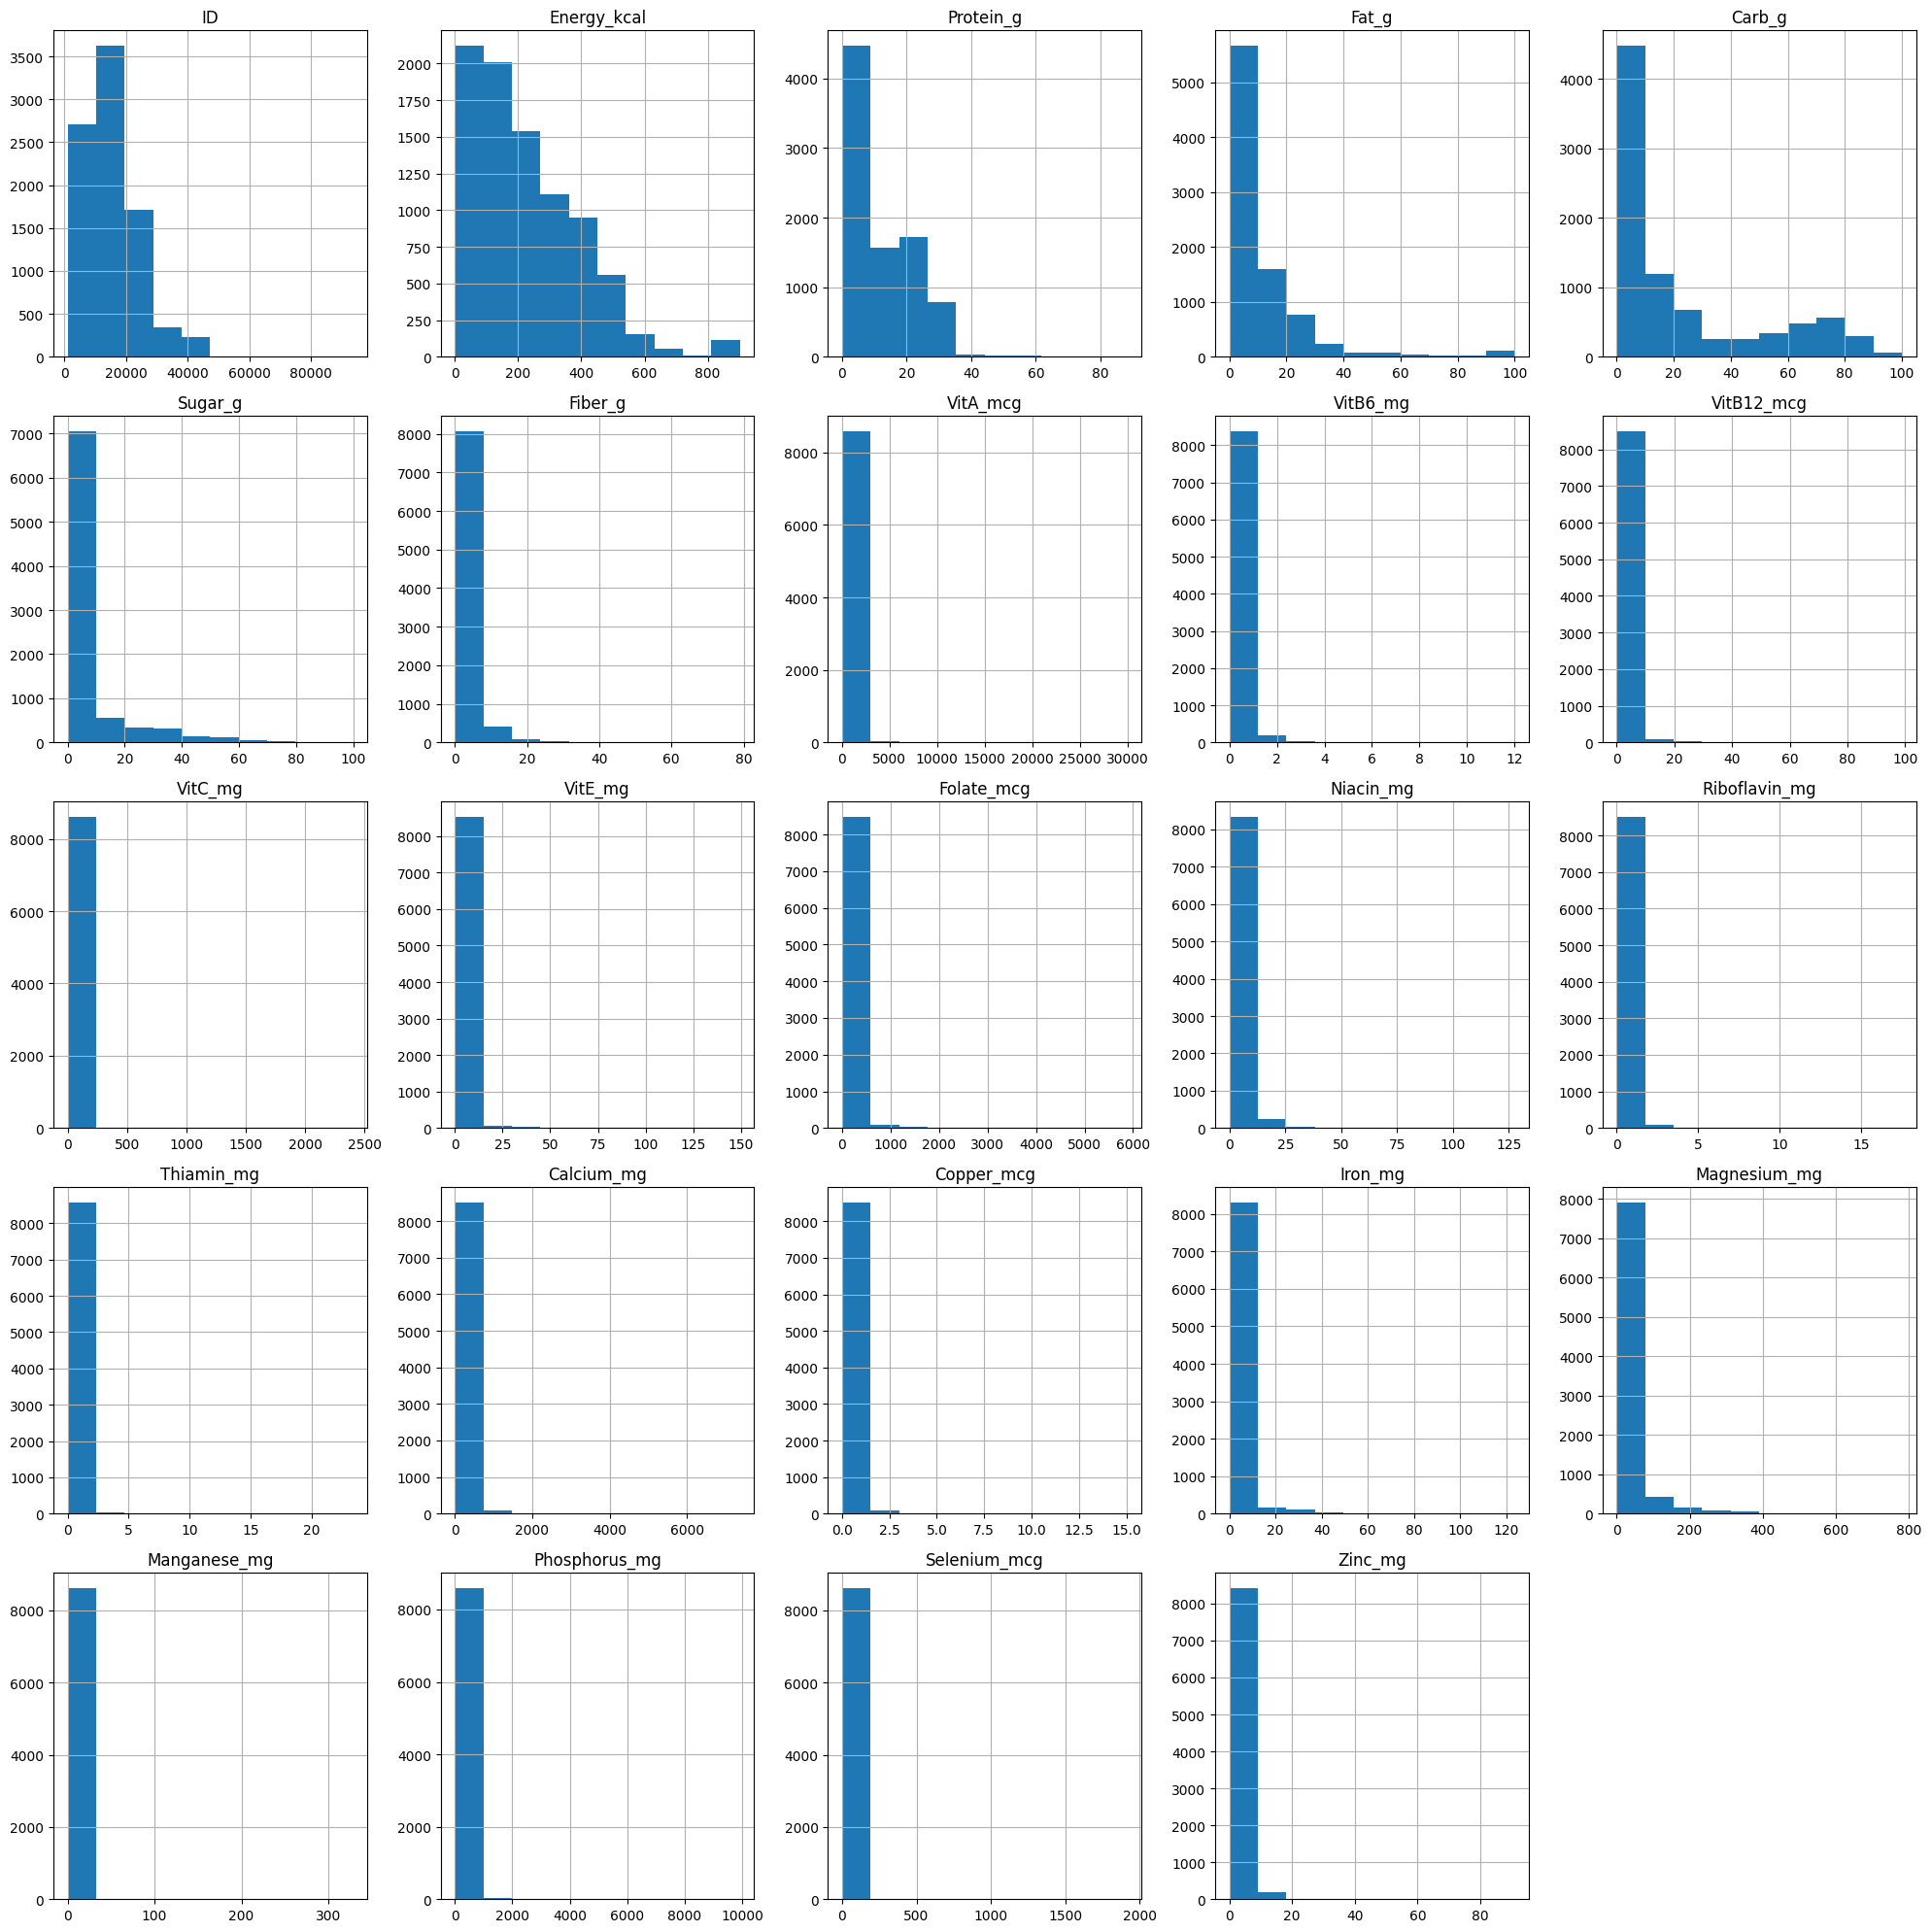

In [8]:
df.hist(figsize = (20, 20))
plt.tight_layout()

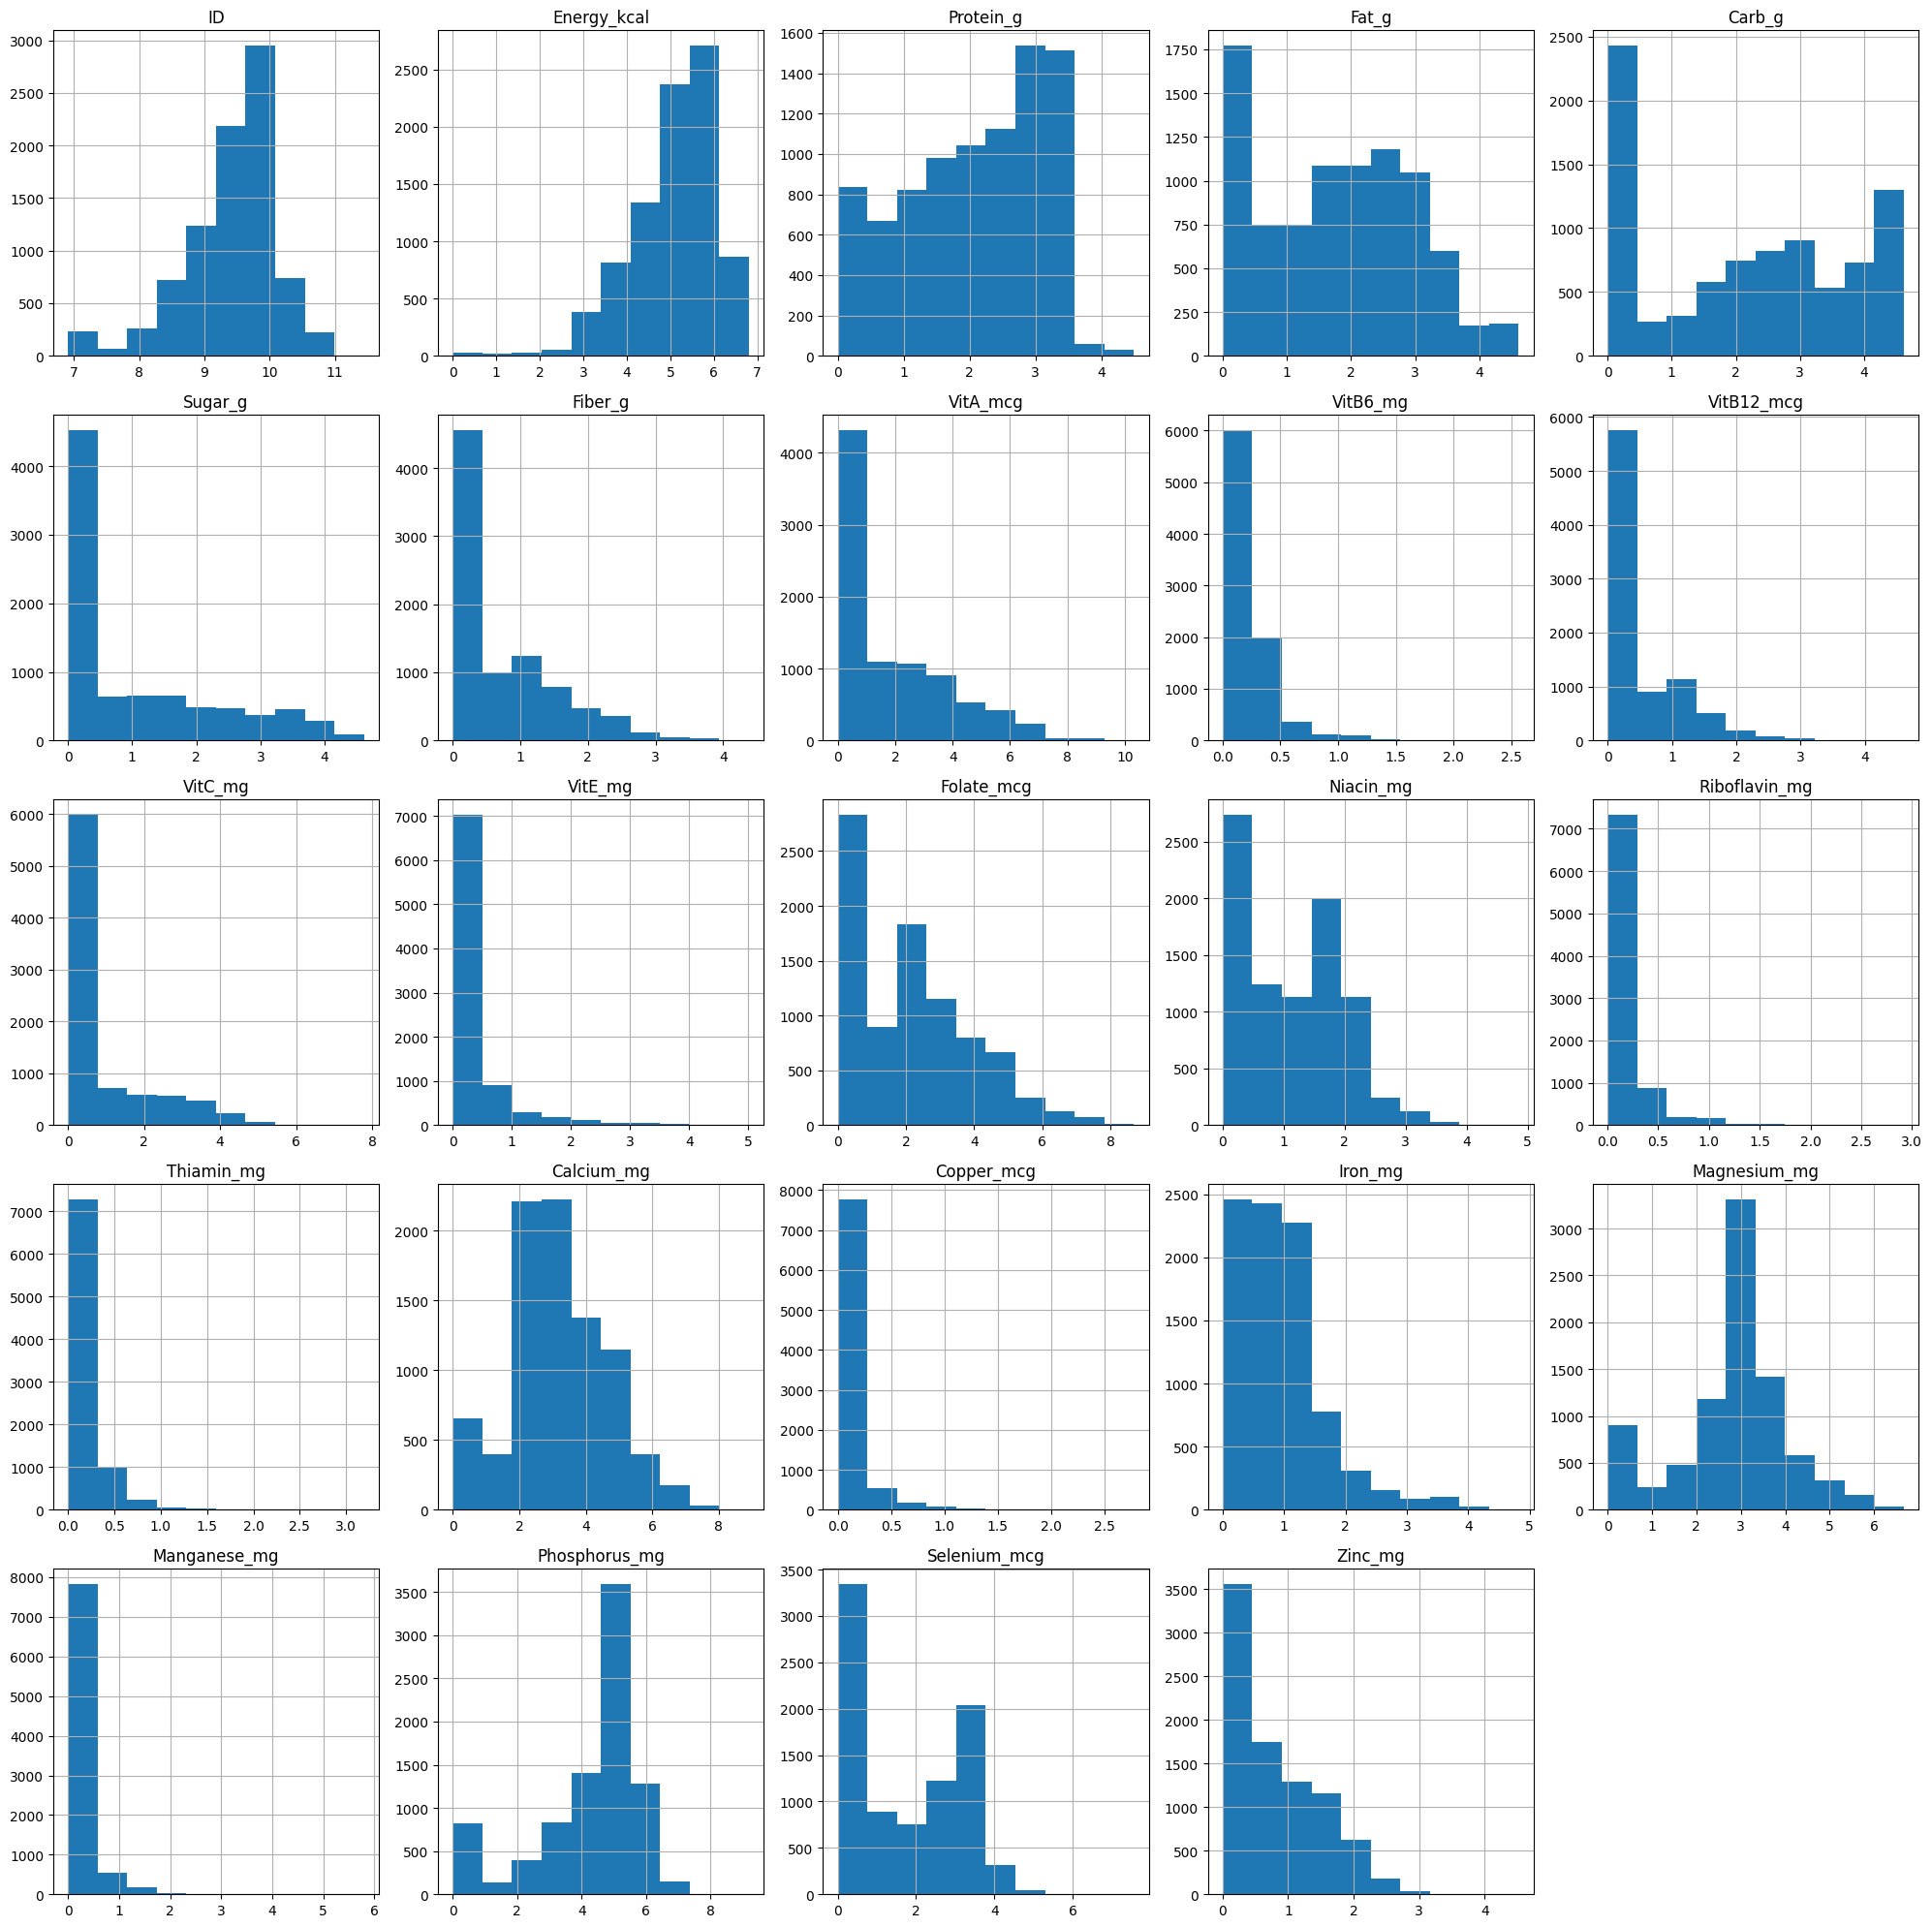

In [9]:
df = np.log(df + 1)

df.hist(figsize = (20, 20))
plt.tight_layout()

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [10]:
scaler = StandardScaler()
df_scal = scaler.fit_transform(df)

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [11]:
pca = PCA()
pca.fit(df_scal)

PCA()

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.29975904 0.15981448 0.08527285 0.06822611 0.06119781 0.04301872
 0.03526472 0.0294758  0.02552534 0.0240854  0.02166582 0.02083199
 0.01810563 0.01770336 0.01371603 0.01280991 0.01229936 0.01072188
 0.00924002 0.0086169  0.00712834 0.00648294 0.00542513 0.00361241]


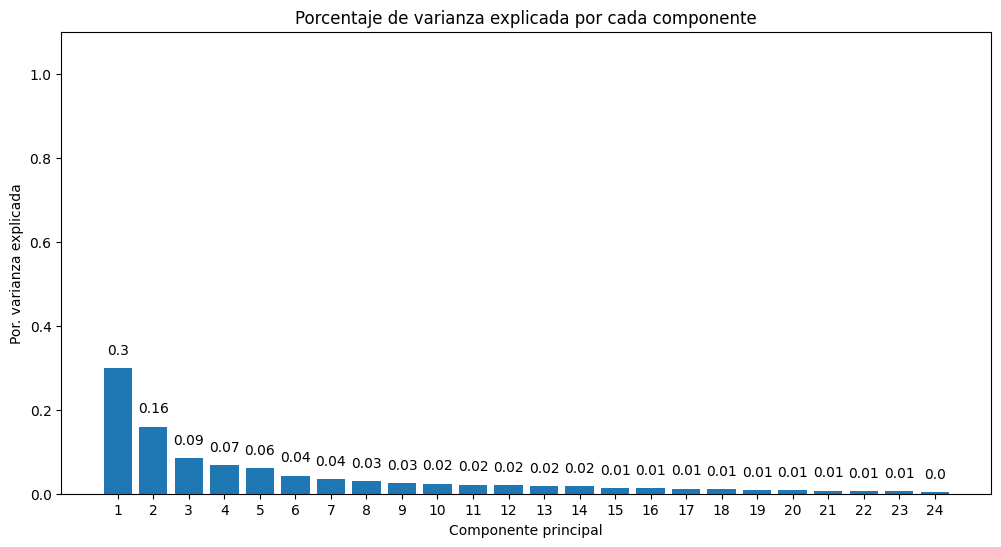

In [12]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29975904 0.45957353 0.54484638 0.61307248 0.6742703  0.71728901
 0.75255374 0.78202954 0.80755488 0.83164028 0.8533061  0.87413809
 0.89224372 0.90994708 0.92366311 0.93647302 0.94877238 0.95949426
 0.96873428 0.97735118 0.98447952 0.99096246 0.99638759 1.        ]


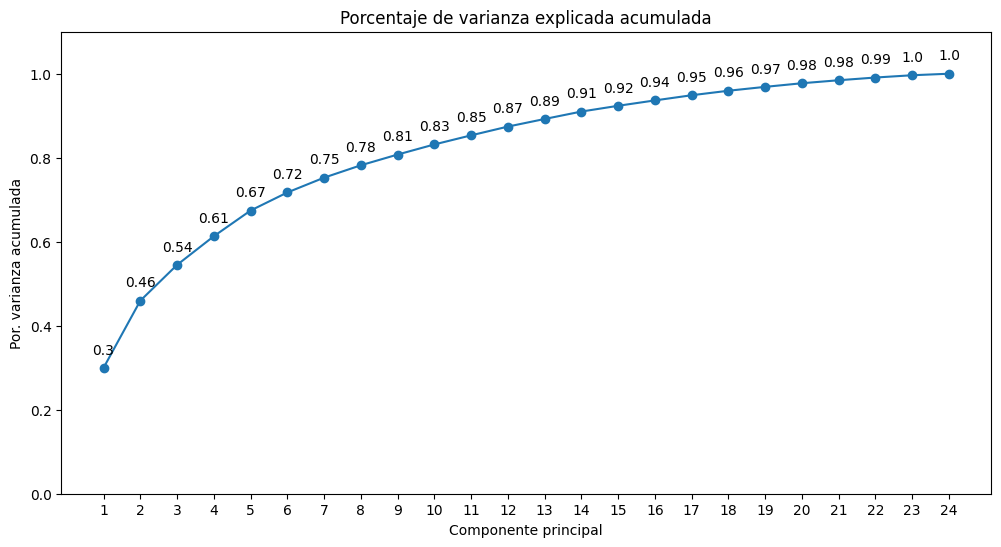

In [13]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.